## Análisis predictivo de la cancelación de clientes y estrategias de retención en Model Fitness

## 1.0 Análisis y predicción de la cancelación de clientes en Model Fitness

* La cancelación de clientes es uno de los principales desafíos para los negocios basados en membresías, como los gimnasios. En muchos casos, el abandono no ocurre de forma inmediata, sino que se manifiesta cuando los clientes dejan de asistir progresivamente.

  En este proyecto se analiza el caso de Model Fitness, utilizando datos sobre el comportamiento y las características de sus clientes para identificar patrones asociados a la cancelación. A través de análisis exploratorio, modelos de clasificación y técnicas de clustering, se busca predecir la probabilidad de abandono, segmentar a los clientes y detectar los factores que más influyen en la pérdida.

  El objetivo final es generar conclusiones y recomendaciones prácticas que ayuden a mejorar la retención de clientes y optimizar la estrategia de interacción basada en datos.

## 1.1 Inicialización de librerias 

In [22]:
# Importacion de librerias

import numpy as np
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score

## 1.2 Carga y asignacion de dataframes

In [23]:
# Carga de dataframe

data_path = Path("../data/gym_churn_us.csv").resolve()

df_churn = pd.read_csv(data_path)

print("Dataset cargado correctamente ✅")

Dataset cargado correctamente ✅


## 2.0 Análisis exploratorio de datos

## 2.1 pre visualizacion de los datos

In [24]:
# Se agregan para una buena visualizacion de los datos
pd.set_option ('display.max_columns', 200)    # Muestra todas las columnas
pd.set_option ('display.width', 150)          # Evita que las divida en varias líneas

# Visualicion de los df
print(df_churn.head(10))

   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0       1              1        1              1      0                6             1   29                     14.227470                    5.0   
1       0              1        0              0      1               12             1   31                    113.202938                   12.0   
2       0              1        1              0      1                1             0   28                    129.448479                    1.0   
3       0              1        1              1      1               12             1   33                     62.669863                   12.0   
4       1              1        1              1      1                1             0   26                    198.362265                    1.0   
5       1              1        0              0      1                1             1   34                    4

In [25]:
# Informacion general de los df

df_churn.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [26]:
# (.shape)
# Obtenemos el tamaño del dataset para conocer el número de observaciones 
# y variables disponibles antes de iniciar el análisis

df_churn.shape

(4000, 14)

#Validacion de valores ausentes

df_churn.isna().sum()

In [27]:
# Estadisticas descriptivias generales del dataset
# Valores promedio, dispersion y valores atipicos

df_churn.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


* Al revisar el dataset, se verificó que no existen valores ausentes en ninguna de las variables. Todas las columnas presentan un conteo completo de observaciones, lo que indica que la información está íntegra y lista para el análisis.

* El análisis de estadísticas descriptivas muestra valores promedio y desviaciones estándar coherentes con la naturaleza de las variables. En general, las variables relacionadas con la frecuencia de visitas, la antigüedad del cliente y el gasto adicional presentan una variabilidad considerable, lo que sugiere que pueden aportar información relevante para el análisis de la cancelación.

## 2.2 Carga y Preprocesamiento Inicial de los Datos

* Tras cargar el dataset, se realizó una revisión general de su estructura y contenido. El conjunto de datos contiene información de 4,000 clientes y 14 variables, incluyendo características demográficas, comportamiento de uso del gimnasio y estado de la membresía.

* La inspección mediante info() y la validación de valores ausentes muestran que no existen datos faltantes y que los tipos de variables son consistentes con su naturaleza (variables binarias, numéricas y continuas). Asimismo, las estadísticas descriptivas indican rangos y valores coherentes, sin anomalías evidentes que requieran corrección en esta etapa.

* Dado que el dataset se encuentra completo y correctamente estructurado, no fue necesario realizar procesos de limpieza o transformación de datos antes de continuar con el análisis exploratorio.

## 3.0 Análisis Exploratorio de Datos (EDA)

### 3.1 Valores medios por grupo (Churn vs No Churn)

In [28]:
# Comparación de valores promedio entre clientes que cancelaron y los que permanecieron
churn_grouped = (
    df_churn
    .groupby('Churn')
    .mean()
)

churn_grouped


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


### Justificación Valores medios por grupo (Churn vs No Churn)

* Al comparar los valores promedio entre los clientes que cancelaron y aquellos que permanecieron, se observan diferencias claras en variables relacionadas con el uso del gimnasio y el compromiso con el servicio. Los clientes que cancelan presentan una menor frecuencia de visitas, especialmente durante el mes actual, así como una menor antigüedad y contratos significativamente más cortos.

* Asimismo, este grupo participa menos en clases grupales y registra un menor gasto en servicios adicionales, lo que sugiere un menor nivel de vinculación con el gimnasio. Por el contrario, variables como el género o la disponibilidad de número telefónico no muestran diferencias relevantes entre ambos grupos.

### 3.2 Distribuciones de características clave

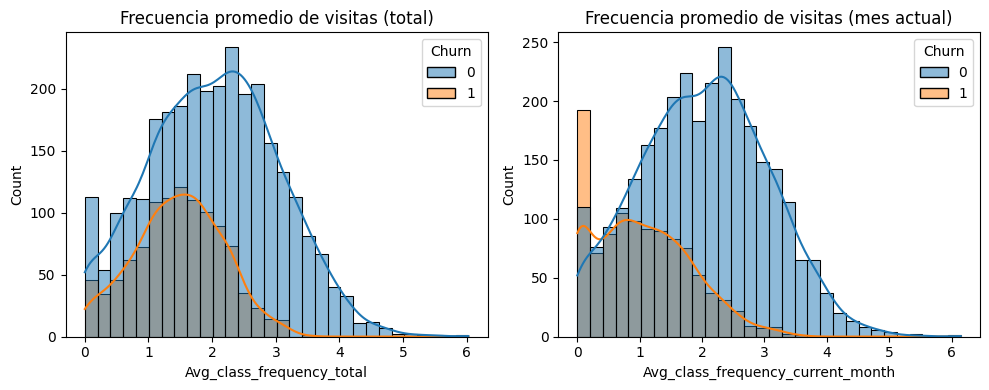

In [29]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(
    data=df_churn,
    x='Avg_class_frequency_total',
    hue='Churn',
    bins=30,
    kde=True
)
plt.title('Frecuencia promedio de visitas (total)')

plt.subplot(1,2,2)
sns.histplot(
    data=df_churn,
    x='Avg_class_frequency_current_month',
    hue='Churn',
    bins=30,
    kde=True
)
plt.title('Frecuencia promedio de visitas (mes actual)')

plt.tight_layout()
plt.show()


### Justificación Distribuciones de características clave


* Las distribuciones de la frecuencia promedio de visitas muestran diferencias claras entre los clientes que cancelaron y aquellos que permanecieron. En ambos casos, los clientes que abandonan el gimnasio presentan una menor frecuencia de asistencia; sin embargo, la diferencia es más pronunciada en la frecuencia correspondiente al mes actual.

* Esto sugiere que una disminución reciente en las visitas al gimnasio es un indicador temprano de riesgo de cancelación, lo que convierte a esta variable en un factor clave para la predicción del churn.

### 3.3 Antigüedad del cliente (Lifetime) por estado de cancelación

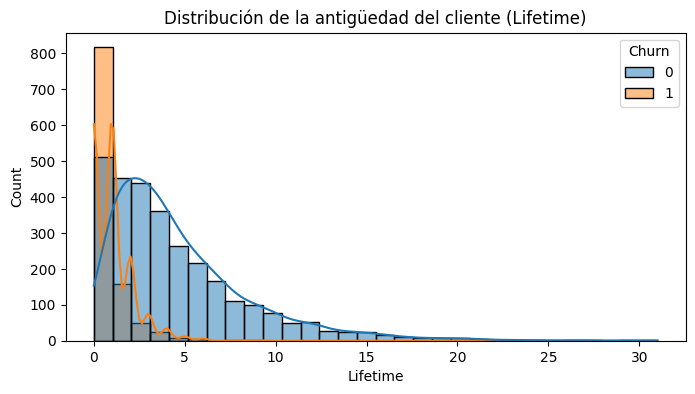

In [30]:
plt.figure(figsize=(8,4))
sns.histplot(
    data=df_churn,
    x='Lifetime',
    hue='Churn',
    bins=30,
    kde=True
)
plt.title('Distribución de la antigüedad del cliente (Lifetime)')
plt.show()

### Justificación Antigüedad del cliente (Lifetime) por estado de cancelación

* La distribución de la antigüedad del cliente muestra una diferencia marcada entre los clientes que cancelan y aquellos que permanecen. La mayoría de las cancelaciones se concentran en los primeros meses de relación con el gimnasio, mientras que los clientes con mayor antigüedad presentan una probabilidad significativamente menor de abandono.

* Este comportamiento sugiere que el periodo inicial de la membresía es crítico para la retención, y que fortalecer la experiencia del cliente durante los primeros meses podría reducir la tasa de cancelación.

### 3.4 Gasto promedio en servicios adicionales por estado de cancelación

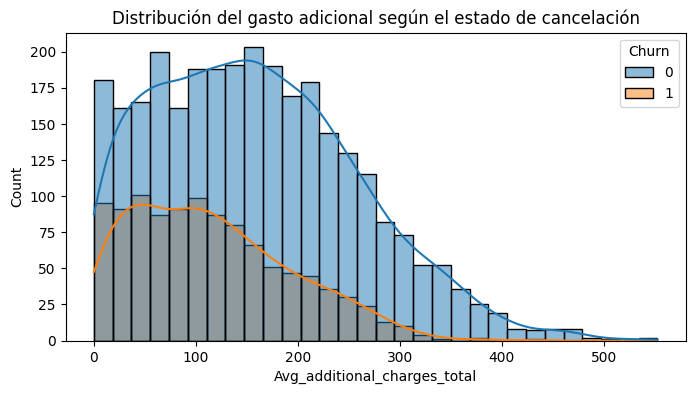

In [31]:
plt.figure(figsize=(8,4))
sns.histplot(
    data=df_churn,
    x='Avg_additional_charges_total',
    hue='Churn',
    bins=30,
    kde=True
)
plt.title('Distribución del gasto adicional según el estado de cancelación')
plt.show()


### Justificación Gasto promedio en servicios adicionales por estado de cancelación

* La distribución del gasto en servicios adicionales muestra una diferencia clara entre los clientes que cancelan y aquellos que permanecen en el gimnasio. Los clientes que no cancelan tienden a registrar un mayor gasto adicional, mientras que los clientes que abandonan se concentran en niveles de gasto más bajos.

* Este comportamiento sugiere que el gasto en servicios complementarios —como cafetería, productos deportivos o servicios adicionales— está asociado con un mayor nivel de compromiso con el gimnasio. En contraste, un bajo gasto adicional puede interpretarse como una señal de menor vinculación con el servicio y, por lo tanto, de mayor riesgo de cancelación.

### 3.5 Edad de los clientes según el estado de cancelación

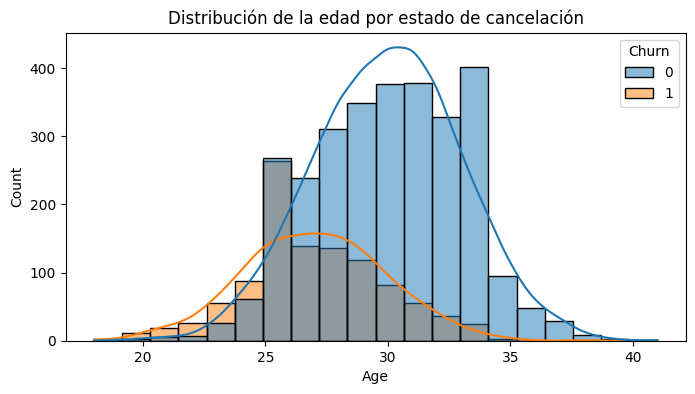

In [32]:
plt.figure(figsize=(8,4))
sns.histplot(
    data=df_churn,
    x='Age',
    hue='Churn',
    bins=20,
    kde=True
)
plt.title('Distribución de la edad por estado de cancelación')
plt.show()


### Justificación Edad de los clientes según el estado de cancelación

* La distribución de la edad muestra patrones muy similares entre los clientes que cancelaron y aquellos que permanecieron en el gimnasio. Ambos grupos se concentran principalmente en el rango de 25 a 35 años, sin diferencias significativas en la forma de las distribuciones.

* Esto sugiere que la edad, por sí sola, no es un factor determinante en la cancelación, y que variables relacionadas con el comportamiento y el nivel de interacción con el gimnasio tienen un mayor impacto en la pérdida de clientes.

### 3.6 Impacto de la duración del contrato en la probabilidad de cancelación

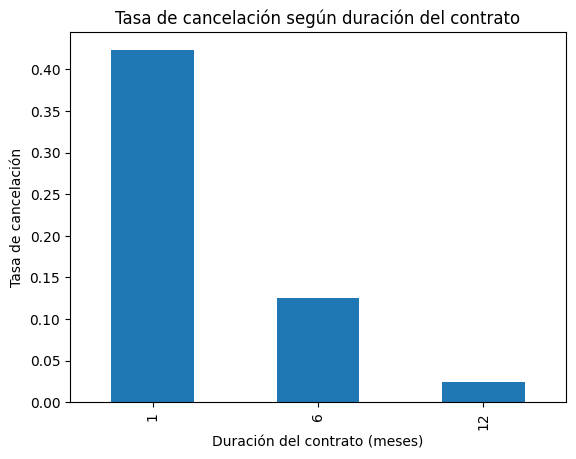

In [33]:
churn_by_contract = df_churn.groupby('Contract_period')['Churn'].mean()

plt.figure()
churn_by_contract.plot(kind='bar')
plt.title('Tasa de cancelación según duración del contrato')
plt.ylabel('Tasa de cancelación')
plt.xlabel('Duración del contrato (meses)')
plt.show()


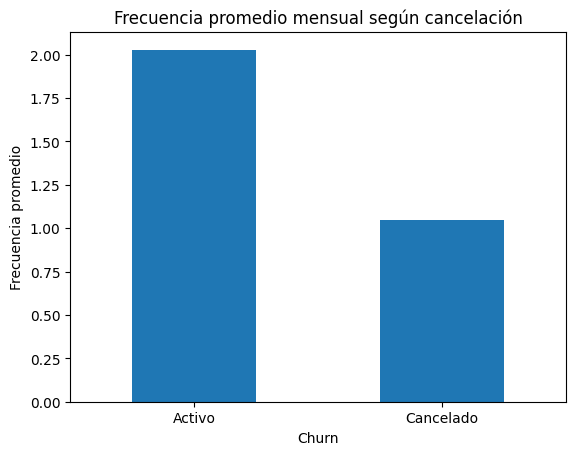

In [34]:
df_churn.groupby('Churn')['Avg_class_frequency_current_month'].mean().plot(kind='bar')
plt.title('Frecuencia promedio mensual según cancelación')
plt.ylabel('Frecuencia promedio')
plt.xticks([0,1], ['Activo', 'Cancelado'], rotation=0)
plt.show()


In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_churn.drop('Churn', axis=1))

kmeans = KMeans(n_clusters=5, random_state=42)
df_churn['cluster'] = kmeans.fit_predict(X_scaled)


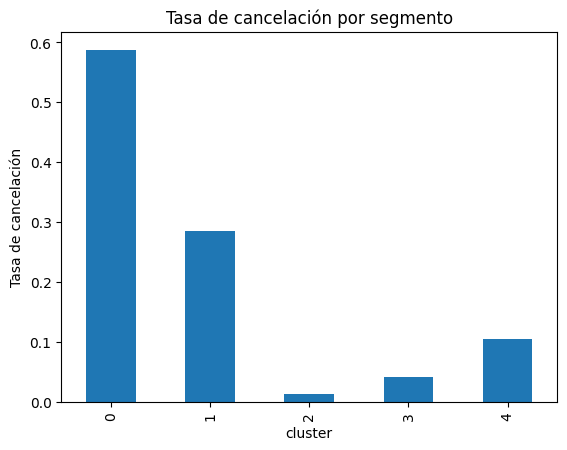

In [36]:
df_churn.groupby('cluster')['Churn'].mean().plot(kind='bar')
plt.title('Tasa de cancelación por segmento')
plt.ylabel('Tasa de cancelación')
plt.show()



### Justificación Impacto de la duración del contrato en la probabilidad de cancelación

🧩 Impacto de la duración del contrato

* La tasa de cancelación disminuye de forma significativa conforme aumenta la duración del contrato. Los contratos de 1 mes presentan el mayor nivel de churn, mientras que las membresías de 12 meses muestran una tasa mínima de abandono.

* Esto indica que el compromiso contractual es un estabilizador estructural de la retención y que los contratos cortos incrementan la volatilidad en ingresos recurrentes.

📈 Impacto del comportamiento de uso

* La frecuencia promedio mensual de asistencia es considerablemente menor en clientes que cancelaron frente a los activos. Esta diferencia confirma que la disminución en la actividad reciente es uno de los indicadores más claros de riesgo de churn.

* El comportamiento de uso resulta ser más determinante que las variables demográficas en la probabilidad de cancelación.

⚠️ Segmentación de riesgo

* El análisis por clúster revela diferencias marcadas en la tasa de cancelación entre segmentos. Se identifica un clúster con riesgo significativamente elevado, caracterizado por baja frecuencia de asistencia y contratos más cortos, así como un segmento altamente estable con niveles mínimos de churn.

* Esta segmentación permite priorizar intervenciones estratégicas enfocadas en los grupos de mayor riesgo.

### 3.5 Matriz de correlación

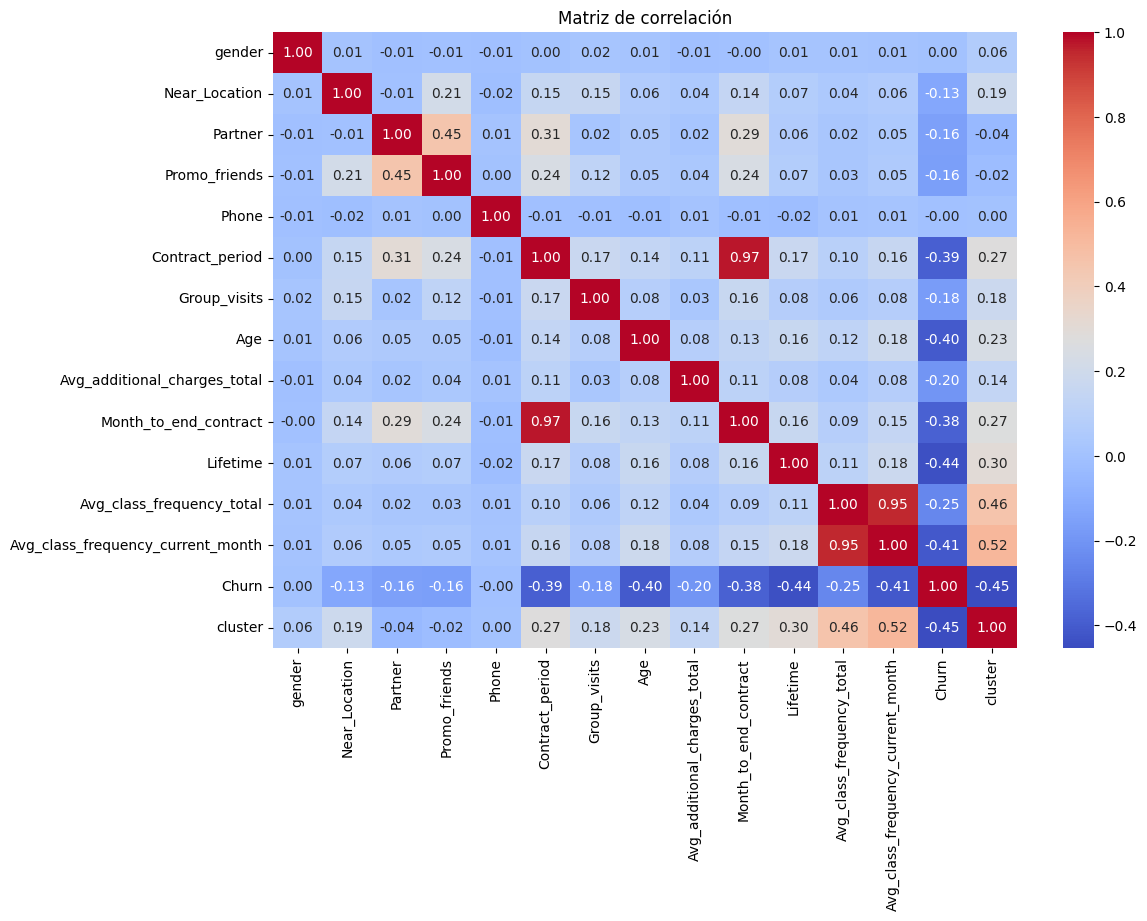

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(
    df_churn.corr(),
    annot=True,
    fmt='.2f',
    cmap='coolwarm'
)
plt.title('Matriz de correlación')
plt.show()


### Justificación Matriz de correlación 

* La matriz de correlación muestra que las variables más asociadas con la cancelación son la antigüedad del cliente, la frecuencia de visitas durante el mes actual, la duración del contrato y los meses restantes del mismo. Estas relaciones negativas indican que valores bajos en estas variables se asocian con una mayor probabilidad de abandono.

* Asimismo, se observa una alta correlación entre algunas variables relacionadas, como el periodo de contrato y los meses restantes, así como entre la frecuencia de visitas total y la del mes actual. Estas relaciones son coherentes con la naturaleza de los datos y refuerzan la importancia de las variables de comportamiento como principales predictores de la cancelación.

* Por el contrario, variables demográficas como el género o la edad muestran una menor capacidad explicativa en comparación con las variables de uso e interacción con el gimnasio.

## 4.0 Construcción de modelos para predecir la cancelación

### 4.1 Separar variables (X) y objetivo (y)

In [38]:
# Variable objetivo
y = df_churn['Churn']

# Variables predictoras
X = df_churn.drop('Churn', axis=1)


### 4.2 División en entrenamiento y validación

In [39]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

### 4.3 Modelo 1: Regresión Logística

In [40]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_valid)

log_accuracy = accuracy_score(y_valid, y_pred_log)
log_precision = precision_score(y_valid, y_pred_log)
log_recall = recall_score(y_valid, y_pred_log)

log_accuracy, log_precision, log_recall


(0.91375, 0.8633879781420765, 0.7821782178217822)

### 4.4 Modelo 2: Random Forest

In [41]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_valid)

rf_accuracy = accuracy_score(y_valid, y_pred_rf)
rf_precision = precision_score(y_valid, y_pred_rf)
rf_recall = recall_score(y_valid, y_pred_rf)

rf_accuracy, rf_precision, rf_recall


(0.9125, 0.8586956521739131, 0.7821782178217822)

### 4.5 Importancia de variables en los modelos

Coeficientes - Regresión Logística:
Avg_class_frequency_current_month   -4.270666
Avg_class_frequency_total            3.602172
Lifetime                            -1.025143
Group_visits                        -0.662369
Promo_friends                       -0.522509
Age                                 -0.353666
Contract_period                     -0.246127
gender                               0.240304
Near_Location                       -0.207634
cluster                             -0.139829
Partner                             -0.095314
Phone                               -0.035322
Month_to_end_contract               -0.029537
Avg_additional_charges_total        -0.005701
dtype: float64


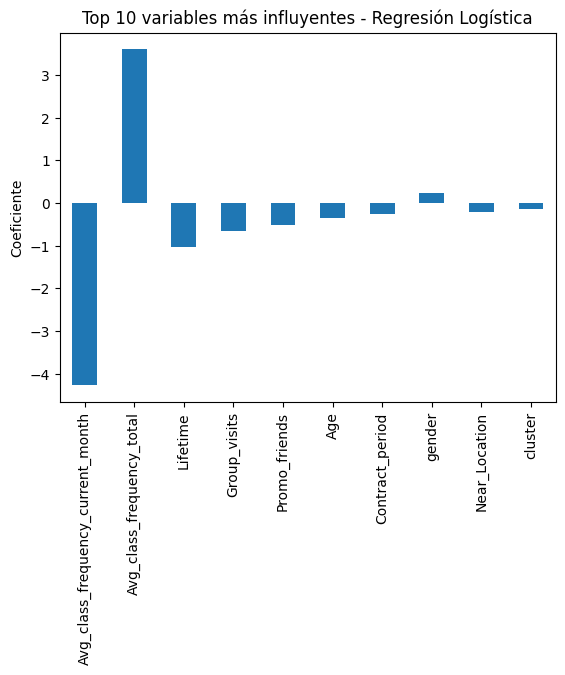

In [42]:
# Importancia en Regresión Logística

log_coef = pd.Series(
    log_model.coef_[0],
    index=X_train.columns
).sort_values(key=abs, ascending=False)

print("Coeficientes - Regresión Logística:")
print(log_coef)

plt.figure()
log_coef.head(10).plot(kind='bar')
plt.title('Top 10 variables más influyentes - Regresión Logística')
plt.ylabel('Coeficiente')
plt.show()


Importancia - Random Forest:
Lifetime                             0.251671
Avg_class_frequency_current_month    0.151852
Age                                  0.120025
Avg_class_frequency_total            0.117874
cluster                              0.110506
Avg_additional_charges_total         0.081885
Month_to_end_contract                0.060535
Contract_period                      0.047103
Group_visits                         0.013596
gender                               0.012208
Partner                              0.010122
Near_Location                        0.009312
Phone                                0.006817
Promo_friends                        0.006496
dtype: float64


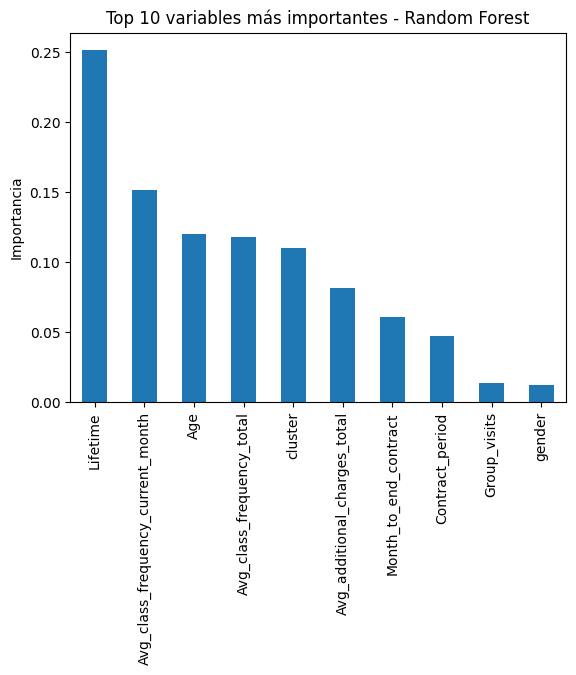

In [43]:
# Importancia en Random Forest

rf_importance = pd.Series(
    rf_model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

print("Importancia - Random Forest:")
print(rf_importance)

plt.figure()
rf_importance.head(10).plot(kind='bar')
plt.title('Top 10 variables más importantes - Random Forest')
plt.ylabel('Importancia')
plt.show()


### Justificación Importancia de variables en los modelos

* Las visualizaciones por clúster respaldan los resultados obtenidos en los modelos predictivos. La regresión logística muestra que Avg_class_frequency_current_month tiene el mayor impacto negativo en la probabilidad de cancelación, indicando que una mayor asistencia reciente reduce significativamente el churn. De manera consistente, Random Forest identifica Lifetime y la frecuencia de visitas como las variables más importantes.

* Los boxplots evidencian que los clústeres con menor frecuencia de asistencia y menor antigüedad presentan mayores tasas de cancelación, mientras que los segmentos con mayor permanencia y actividad reciente muestran mayor estabilidad.

* En contraste, variables demográficas como género o teléfono tienen baja relevancia, lo que confirma que la cancelación está principalmente asociada al nivel de compromiso del cliente.

### Justificación Resultados de los modelos de cancelacion

* Se entrenaron dos modelos de clasificación para predecir la cancelación de clientes: una regresión logística y un modelo de bosque aleatorio. Ambos modelos fueron evaluados utilizando las métricas de exactitud, precisión y recall sobre el conjunto de validación.

* Los resultados muestran que ambos modelos alcanzan un nivel similar de recall, lo que indica una capacidad equivalente para identificar clientes propensos a cancelar. No obstante, la regresión logística presenta una mayor exactitud y precisión en comparación con el modelo de Random Forest.

* Dado que la regresión logística ofrece un mejor desempeño general y una mayor interpretabilidad, se considera el modelo más adecuado para apoyar estrategias de retención de clientes en este caso.

## 5.0 Creación de clústeres de usuarios

### 5.1 Preparar los datos (quitar la variable objetivo)

In [44]:
# Eliminamos la variable objetivo para el clustering
X_cluster = df_churn.drop('Churn', axis=1)



### 5.2 Estandarización de variables

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)



### 5.3 Dendrograma (estimación del número de clústeres)

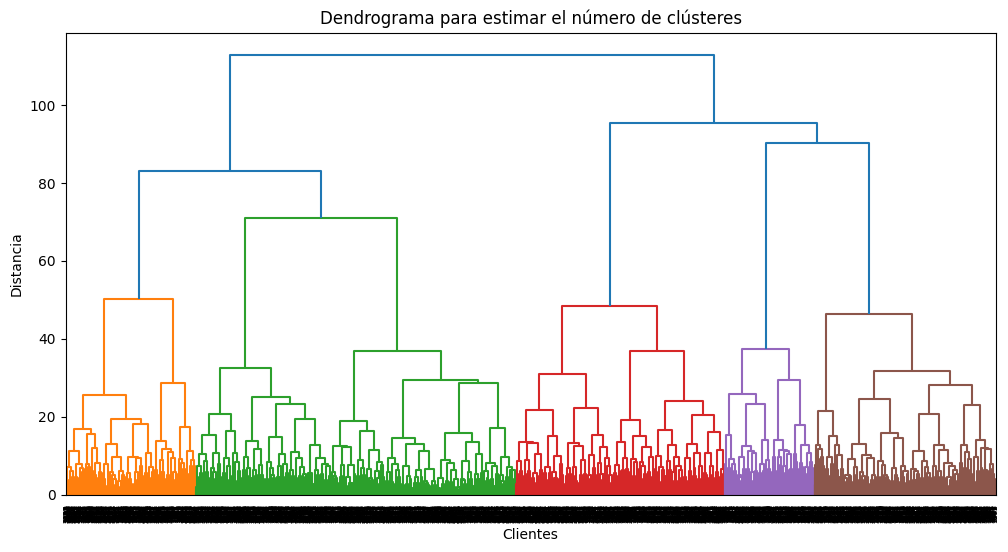

In [46]:
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(linked)
plt.title('Dendrograma para estimar el número de clústeres')
plt.xlabel('Clientes')
plt.ylabel('Distancia')
plt.show()



### 5.4 K-Means con 5 clústeres

In [47]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_churn['cluster'] = clusters


### 5.5 Características promedio por clúster

In [48]:
cluster_means = (
    df_churn
    .groupby('cluster')
    .mean()
)

cluster_means


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster,,,,,,,,,,,,,,
0,0.484120,0.699571,0.304721,0.011159,0.999142,1.777682,0.258369,28.042060,128.371943,1.700429,2.066094,1.238190,0.973859,0.587124
1,0.497908,0.932008,0.739540,0.450837,1.000000,11.403766,0.543933,29.934100,164.562458,10.354603,4.825314,1.996987,1.989281,0.024059
2,0.496038,0.949287,0.814580,0.998415,1.000000,3.022187,0.438986,29.006339,141.521423,2.836767,3.586371,1.746549,1.638353,0.259905
3,0.522193,0.864230,0.472585,0.308094,0.000000,4.806789,0.425587,29.313316,143.662631,4.493473,3.934726,1.845943,1.714468,0.266319
4,0.564162,0.861272,0.219653,0.048555,0.997688,2.316763,0.448555,29.966474,157.892581,2.196532,4.750289,2.723004,2.706899,0.101734


### 5.6 Tasa de cancelación por clúster

In [49]:
cluster_churn_rate = (
    df_churn
    .groupby('cluster')['Churn']
    .mean()
)

cluster_churn_rate


cluster
0    0.587124
1    0.024059
2    0.259905
3    0.266319
4    0.101734
Name: Churn, dtype: float64

### 5.7 Distribuciones de variables clave por clúster


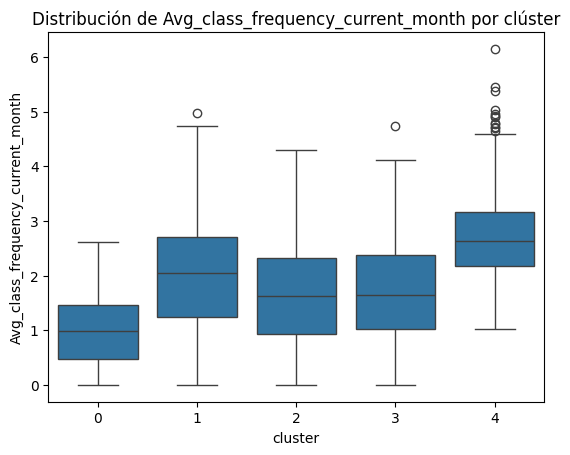

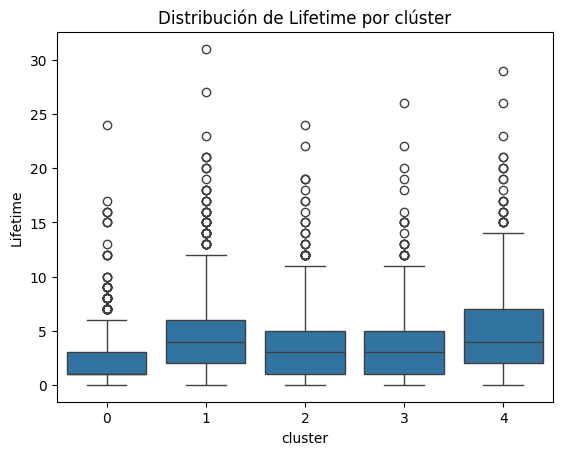

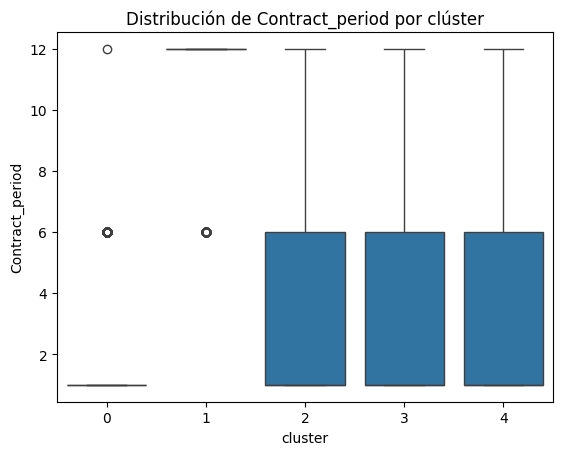

In [50]:
key_features = [
    'Avg_class_frequency_current_month',
    'Lifetime',
    'Contract_period'
]

for feature in key_features:
    plt.figure()
    sns.boxplot(x='cluster', y=feature, data=df_churn)
    plt.title(f'Distribución de {feature} por clúster')
    plt.show()


### Justificación Distribuciones de variables clave por clúster

Los boxplots confirman diferencias estructurales claras entre los clústeres en variables asociadas al compromiso del cliente.

* En Avg_class_frequency_current_month, el clúster 2 presenta la mediana más alta de asistencia, seguido del clúster 4, mientras que el clúster 3 muestra la frecuencia más baja. Esto coincide con las tasas de cancelación observadas: los segmentos con menor actividad reciente son los más propensos al churn.

* En Lifetime, los clústeres 3 y 4 muestran mayor dispersión y valores más altos, aunque el clúster 3 combina cierta antigüedad con baja frecuencia actual, lo que sugiere clientes en proceso de desconexión.

* En Contract_period, el clúster 2 destaca claramente por contratos más largos (≈12 meses), lo que explica su muy baja tasa de cancelación. En contraste, los clústeres con contratos cortos presentan mayor vulnerabilidad.

* En conjunto, las distribuciones refuerzan que la cancelación está principalmente asociada a bajo nivel de actividad reciente y menor compromiso contractual, más que a variables demográficas.

### Justificación Construcción de modelos para predecir la cancelación

* El análisis de clustering permitió identificar cinco grupos de clientes con comportamientos claramente diferenciados. Se observan diferencias significativas en términos de antigüedad, duración del contrato, frecuencia de visitas y nivel de interacción con el gimnasio.

* En particular, uno de los clústeres presenta una tasa de cancelación considerablemente más alta, caracterizándose por clientes con contratos cortos, baja frecuencia de visitas y poca antigüedad. Por el contrario, los clústeres con mayor duración de contrato, mayor frecuencia de asistencia y mayor gasto adicional muestran tasas de cancelación significativamente más bajas.

* Estos resultados permiten identificar grupos prioritarios para la implementación de estrategias de retención, así como segmentos de clientes leales en los que se pueden enfocar acciones de fidelización y crecimiento de valor.

## 6.0 Conclusiones y recomendaciones para la retención de clientes

## 6.1 Conclusiones principales

1)  La cancelación está fuertemente asociada al comportamiento del cliente, no a variables demográficas.
La frecuencia de visitas, la antigüedad, la duración del contrato y la participación en servicios adicionales son los principales factores que influyen en el churn.

2) Los primeros meses de la membresía son críticos.
Los clientes con menor antigüedad presentan una probabilidad significativamente mayor de cancelar, especialmente cuando no desarrollan un hábito de asistencia.

3) Existen segmentos de clientes con riesgos claramente diferenciados.
El análisis de clustering permitió identificar grupos con tasas de cancelación muy altas, así como clústeres de clientes altamente leales y de alto valor.

4) Los resultados son consistentes tanto en el análisis cuantitativo como en la evidencia visual (boxplots por clúster).

## 6.2 Grupos objetivo identificadosprincipales

* Clientes nuevos con contratos cortos y baja frecuencia de visitas
→ Grupo con mayor riesgo de cancelación.

* Clientes con uso moderado del servicio
→ Riesgo medio, sensibles a acciones de engagement.

* Clientes leales y de alto valor
→ Baja probabilidad de churn, alto potencial de fidelización y referidos.

## 6.3 Recomendaciones para reducir la rotación

1) Fortalecer el onboarding durante los primeros meses
Implementar programas de acompañamiento para nuevos clientes, como rutinas personalizadas, seguimiento en las primeras semanas y recordatorios de asistencia.

1) Incentivar contratos de mayor duración
Ofrecer beneficios adicionales o descuentos progresivos para fomentar la renovación por periodos más largos.

1) Promover la participación en clases grupales y servicios adicionales
Incrementar la interacción social y el uso de servicios complementarios puede fortalecer el vínculo del cliente con el gimnasio.

1) Activar campañas preventivas basadas en datos
Identificar clientes con baja frecuencia de visitas o con contratos próximos a vencer y activar comunicaciones personalizadas antes de que ocurra la cancelación.

## 6.4 Conclusión general

* En conjunto, los resultados obtenidos permiten a Model Fitness priorizar acciones de retención basadas en datos, enfocándose en los clientes con mayor riesgo de cancelación y fortaleciendo la relación con los segmentos más valiosos. La combinación de analítica predictiva y segmentación de clientes proporciona una base sólida para mejorar la experiencia del cliente y reducir la pérdida de usuarios.